In [1]:
# data --> model --> prediction
# data --> x(features),y(labels) --> data --> prediction 

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
X, y = fetch_california_housing(return_X_y = True)

In [4]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
# .fit --> X,y

In [7]:
# import the model
from sklearn.neighbors import KNeighborsRegressor

In [8]:
mod = KNeighborsRegressor()

In [9]:
# mod.predict(X)

In [10]:
mod.fit(X,y)

KNeighborsRegressor()

In [11]:
pred = mod.predict(X)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
mod1 = LinearRegression()

In [14]:
mod1.fit(X,y)

LinearRegression()

In [15]:
mod1.predict(X)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Actual Prices')

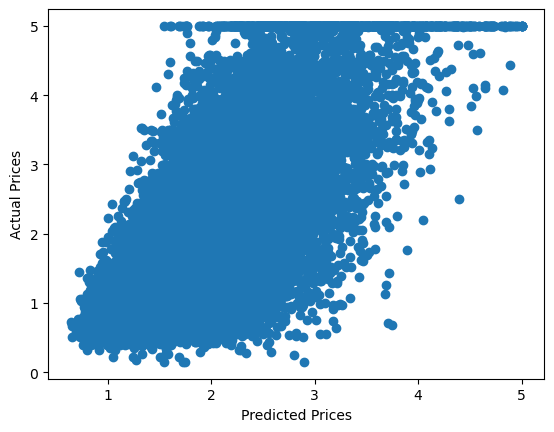

In [17]:
plt.scatter(pred, y)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")

In [18]:
# Preprocessing
# data-->xX,y --> scale --> model --> predict

In [19]:
# pipeline = scale--> model 
# pipeline has api .fit .predict
# pipeline may also be regarded as model

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
]) 

In [22]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [23]:
pred = pipe.predict(X)

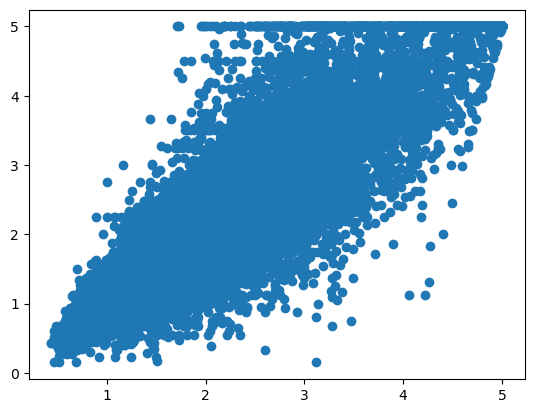

In [24]:
plt.scatter(pred, y)

In [25]:
pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [26]:
pipe2.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [27]:
pred = pipe2.predict(X)

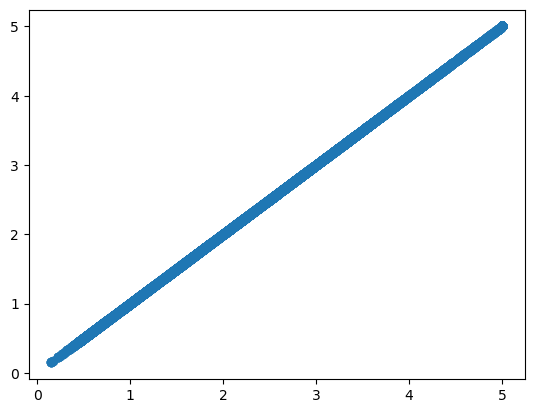

In [28]:
plt.scatter(pred, y)

In [29]:
# Train, predict

In [30]:
# Dividing the dataset
# Grid Search ---> .fit .predict

In [31]:
from sklearn.model_selection import GridSearchCV
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [32]:
# cv = cross validation
model = GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9]}, cv=3)

In [33]:
model.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [34]:
cv_results = model.cv_results_

In [35]:
import pandas as pd
df = pd.DataFrame(cv_results)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032848,0.003221,0.673984,0.033352,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,9
1,0.031210,0.000577,0.759791,0.074245,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,8
2,0.030170,0.001358,0.784943,0.057638,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,7
3,0.031197,0.000695,0.839535,0.069270,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,6
4,0.040592,0.012025,0.937271,0.103932,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,5
5,0.032679,0.001689,0.967982,0.063135,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,4
6,0.030157,0.001825,0.914604,0.043774,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,3
7,0.029021,0.000726,0.944195,0.073221,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,2
8,0.030188,0.000984,0.949731,0.079482,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,1


In [36]:
data = fetch_california_housing()

In [37]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [38]:
# data --> transform --> model 

In [39]:
df = pd.read_csv("drawndata1.csv");
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


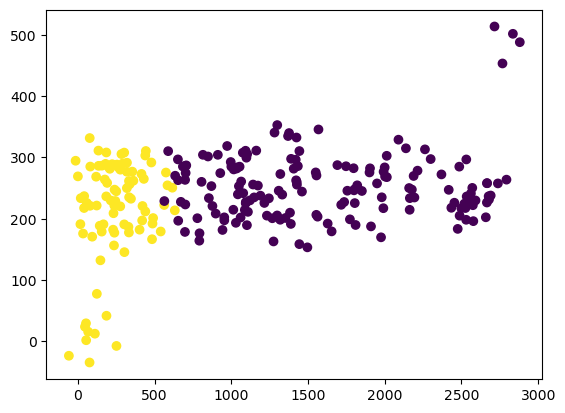

In [40]:
c = df["z"]=="a"
plt.scatter(df["x"], df["y"], c=c)

In [41]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]
scaler = StandardScaler()

In [42]:
X_transform = scaler.fit_transform(X);
X_transform

array([[-1.28490284e+00, -2.02938609e-01],
       [-1.07019011e+00,  1.06286357e-01],
       [-1.16834885e+00,  6.62442922e-01],
       [-1.04271130e+00,  6.29224047e-01],
       [-1.13387717e+00,  9.69410783e-01],
       [-1.13999061e+00,  7.04799839e-01],
       [-1.05154411e+00,  6.88669471e-01],
       [-1.01707798e+00,  9.32760991e-01],
       [-1.19503336e+00,  1.01244490e+00],
       [-8.43593131e-01,  3.55711966e-01],
       [-9.58498740e-01,  3.07028637e-01],
       [-9.53904849e-01,  2.32077079e-01],
       [-1.33474572e+00, -6.94908496e-01],
       [-1.07838422e+00, -4.41591025e-01],
       [-1.02616337e+00, -2.81701682e-01],
       [-8.76483033e-01, -8.23516780e-01],
       [-1.31412137e+00, -9.13222090e-01],
       [-1.18501236e+00, -7.32397990e-01],
       [-1.07174408e+00, -8.93754092e-01],
       [-1.16959047e+00, -8.68372412e-01],
       [-1.30617644e+00, -3.20344923e-01],
       [-1.20853433e+00, -2.63137180e-01],
       [-1.30555057e+00, -4.44734188e-02],
       [-1.

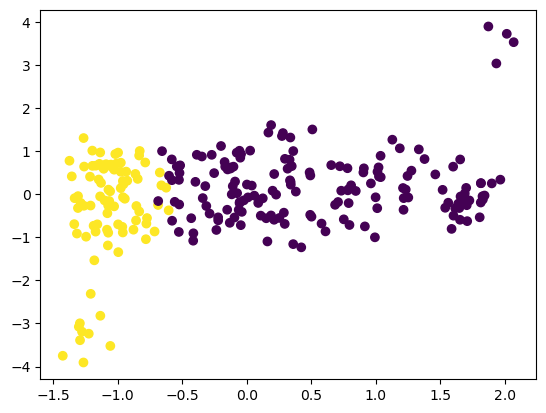

In [43]:
plt.scatter(X_transform[:,0], X_transform[:,1],c=c)

In [44]:
import numpy as np
x = np.random.exponential(10,(1000))+np.random.normal(0,1,(1000))

(array([ 74., 169., 156., 128., 100.,  78.,  76.,  40.,  43.,  33.,  20.,
         18.,  15.,  10.,   8.,   6.,   6.,   3.,   5.,   3.,   3.,   1.,
          2.,   0.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([-1.60486641,  0.82970432,  3.26427505,  5.69884578,  8.13341651,
        10.56798724, 13.00255797, 15.43712871, 17.87169944, 20.30627017,
        22.7408409 , 25.17541163, 27.60998236, 30.04455309, 32.47912382,
        34.91369455, 37.34826528, 39.78283601, 42.21740674, 44.65197747,
        47.0865482 , 49.52111893, 51.95568966, 54.39026039, 56.82483113,
        59.25940186, 61.69397259, 64.12854332, 66.56311405, 68.99768478,
        71.43225551]),
 <BarContainer object of 30 artists>)

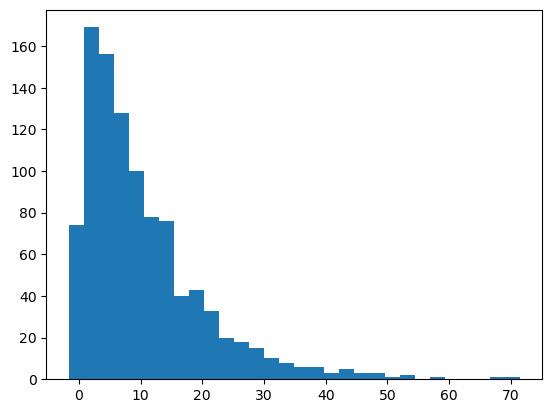

In [45]:
plt.hist(x, bins=30)

(array([ 74., 169., 156., 128., 100.,  78.,  76.,  40.,  43.,  33.,  20.,
         18.,  15.,  10.,   8.,   6.,   6.,   3.,   5.,   3.,   3.,   1.,
          2.,   0.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([-1.20408611, -0.96014246, -0.71619881, -0.47225515, -0.2283115 ,
         0.01563215,  0.25957581,  0.50351946,  0.74746311,  0.99140677,
         1.23535042,  1.47929408,  1.72323773,  1.96718138,  2.21112504,
         2.45506869,  2.69901234,  2.942956  ,  3.18689965,  3.4308433 ,
         3.67478696,  3.91873061,  4.16267426,  4.40661792,  4.65056157,
         4.89450522,  5.13844888,  5.38239253,  5.62633618,  5.87027984,
         6.11422349]),
 <BarContainer object of 30 artists>)

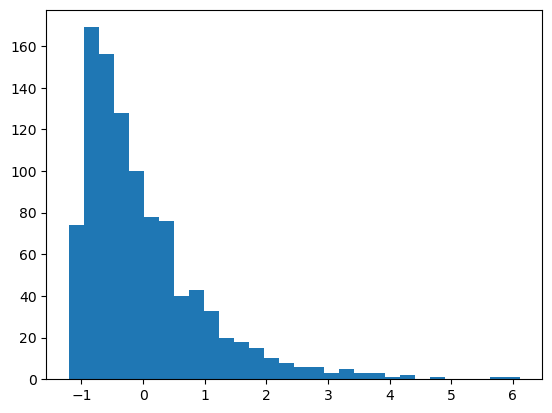

In [46]:
plt.hist((x-np.mean(x))/np.std(x), bins=30)

In [47]:
# outlier is a problem

In [48]:
# Quantile --> percentage

In [49]:
from sklearn.preprocessing import QuantileTransformer

In [50]:
X_transform = QuantileTransformer(n_quantiles=100).fit_transform(X)

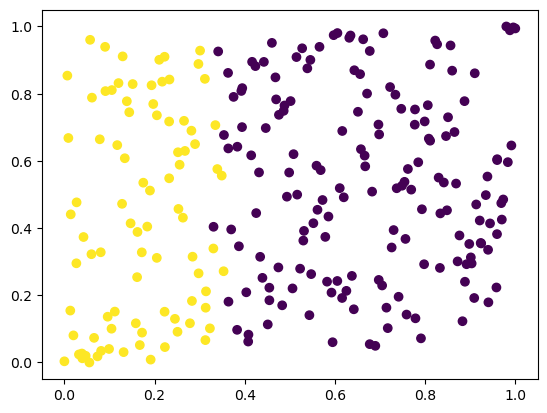

In [51]:
plt.scatter(X_transform[:,0], X_transform[:,1],c=c)

In [52]:
df = pd.read_csv("drawndata2.csv");
df.head()

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


In [53]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

pipe = Pipeline([
    ("scaler",QuantileTransformer(n_quantiles=100)),
    ("model",LogisticRegression()) ]
);

In [54]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]
pipe.fit(X,y)

Pipeline(steps=[('scaler', QuantileTransformer(n_quantiles=100)),
                ('model', LogisticRegression())])

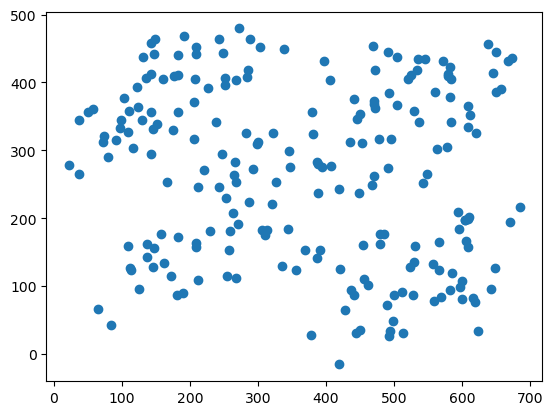

In [55]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

In [56]:
pred = pipe.predict(X)
pred

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a',
       'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a

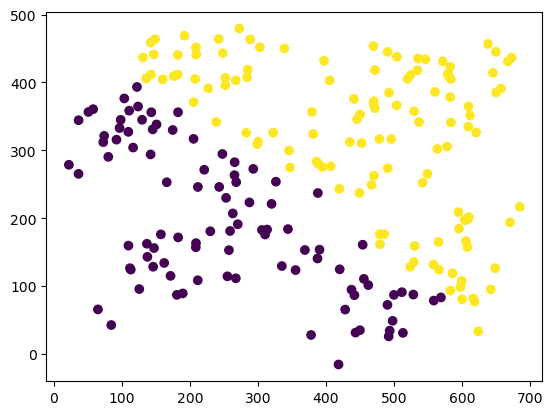

In [57]:
pred = pred=="a"
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=pred)

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
pipe = Pipeline([
    ("scaler",PolynomialFeatures()),
    ("model",LogisticRegression()) ]
);

X = df.iloc[:,0:2]
y = df.iloc[:,2]
pipe.fit(X,y)

pred = pipe.predict(X)
pred

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b

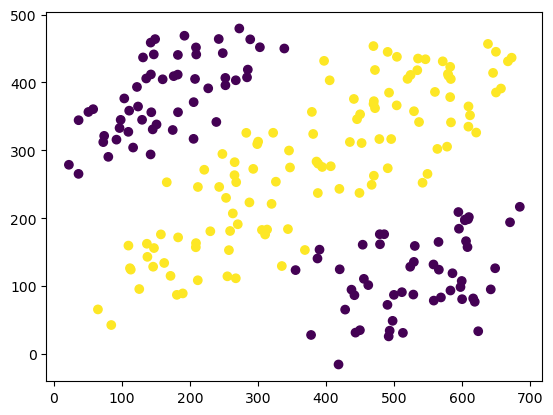

In [60]:
pred = pred=="a"
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=pred)

In [61]:
arr = np.array(["low","low", "high", "medium"])

In [62]:
arr

array(['low', 'low', 'high', 'medium'], dtype='<U6')

In [63]:
arr = arr.reshape(-1,1)

In [64]:
# converting text to numeric

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [67]:
encoder.transform([["zero"]])

array([[0., 0., 0.]])

In [68]:
# drawsata.xyz

In [69]:
# from kaggle: Credit card fault detection
df = pd.read_csv("creditcard.csv")[:80_000]

In [70]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
X = df.drop(columns=['Time', 'Amount', 'Class'])
y = df['Class']

In [72]:
y.unique()

array([0, 1], dtype=int64)

In [73]:
y.value_counts()

Class
0    79803
1      196
Name: count, dtype: int64

In [74]:
# 196 out of 80_000 is very low
# unbalanced

In [75]:
model = LogisticRegression(max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [76]:
model.predict(X).sum()

151

In [77]:
model = LogisticRegression(class_weight={0:1, 1:5},max_iter=1000)
model.fit(X,y)
model.predict(X).sum()

196

In [78]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [79]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={"class_weight":[{0:1, 1:5}, {0:1, 1:4}, {0:1, 1:3}, {0:1, 1:2}, {0:1,1:1}]},
    cv=4
)
grid

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 4},
                                          {0: 1, 1: 3}, {0: 1, 1: 2},
                                          {0: 1, 1: 1}]})

In [80]:
grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 4},
                                          {0: 1, 1: 3}, {0: 1, 1: 2},
                                          {0: 1, 1: 1}]})

In [81]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.836180,0.277326,0.009527,0.003411,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.98175,0.99850,0.99955,0.99825,0.994512,0.007385,5
1,1.153585,0.340781,0.013816,0.004346,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.98465,0.99850,0.99960,0.99820,0.995237,0.006135,4
2,0.825847,0.152420,0.007993,0.000005,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3
3,0.803071,0.176844,0.007247,0.000828,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
4,0.830932,0.222374,0.007506,0.001116,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997412,0.002030,1


In [82]:
??model.score

In [83]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [84]:
precision_score(y, grid.predict(X))

0.7682119205298014

In [85]:
recall_score(y, grid.predict(X))

0.5918367346938775

In [86]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={"class_weight":[{0:1, 1:5}, {0:1, 1:4}, {0:1, 1:3}, {0:1, 1:2}, {0:1,1:1}]},
    cv=4,
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='precision'
)
grid.fit(X,y)
results = pd.DataFrame(grid.cv_results_)

In [87]:
# np.linspace(1,91,30) 
# starts at 1 ends at 91 have 30 steps in between

In [88]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,0.797062,0.179523,0.031995,0.003232,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.114634,0.952381,0.934783,0.818182,0.704995,0.344724,5,0.959184,0.408163,0.877551,0.367347,0.653061,0.267261,1
1,0.773080,0.151879,0.031000,0.001585,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.133523,1.000000,0.955556,0.809524,0.724651,0.348486,4,0.959184,0.387755,0.877551,0.346939,0.642857,0.277393,2
2,0.793363,0.168746,0.030598,0.000712,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.000000,0.955556,0.800000,0.727609,0.338900,3,0.938776,0.367347,0.877551,0.326531,0.627551,0.281816,3
3,0.808914,0.175701,0.031489,0.001105,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.000000,0.955556,0.812500,0.739683,0.324451,2,0.918367,0.346939,0.877551,0.265306,0.602041,0.297672,4
4,0.824315,0.238314,0.028313,0.002393,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.000000,0.952381,0.857143,0.772693,0.288359,1,0.918367,0.326531,0.816327,0.122449,0.545918,0.331397,5


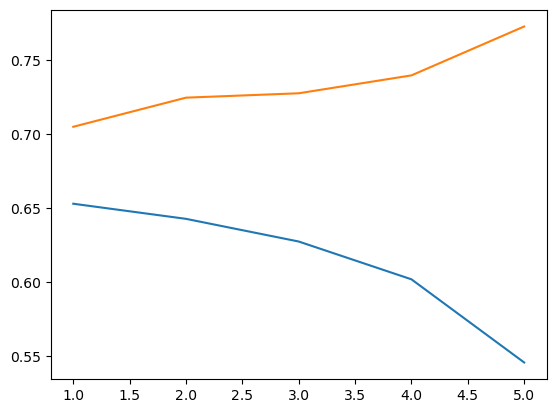

In [89]:
class_weight = [1,2,3,4,5]
plt.plot(class_weight, results["mean_test_recall_score"]);
plt.plot(class_weight, results["mean_test_precision"])

In [90]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [91]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={"class_weight":[{0:1, 1:5}, {0:1, 1:4}, {0:1, 1:3}, {0:1, 1:2}, {0:1,1:1}]},
    cv=4,
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'min_recall_precision': make_scorer(min_recall_precision)},
    refit='min_recall_precision'
)
grid.fit(X,y)
results = pd.DataFrame(grid.cv_results_)

In [92]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_test_min_recall_precision,split1_test_min_recall_precision,split2_test_min_recall_precision,split3_test_min_recall_precision,mean_test_min_recall_precision,std_test_min_recall_precision,rank_test_min_recall_precision
0,0.799480,0.168941,0.057529,0.005592,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.114634,0.952381,0.934783,0.818182,...,0.653061,0.267261,1,0.114634,0.408163,0.877551,0.367347,0.441924,0.275495,1
1,0.793780,0.150725,0.055529,0.000487,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.133523,1.000000,0.955556,0.809524,...,0.642857,0.277393,2,0.133523,0.387755,0.877551,0.346939,0.436442,0.272359,2
2,0.822293,0.166808,0.062280,0.009818,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.000000,0.955556,0.800000,...,0.627551,0.281816,3,0.154882,0.367347,0.877551,0.326531,0.431578,0.269543,3
3,0.816849,0.170258,0.058059,0.003018,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.000000,0.955556,0.812500,...,0.602041,0.297672,4,0.190678,0.346939,0.877551,0.265306,0.420118,0.269819,4
4,0.834472,0.225485,0.056501,0.002289,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.000000,0.952381,0.857143,...,0.545918,0.331397,5,0.281250,0.326531,0.816327,0.122449,0.386639,0.259397,5


In [93]:
s = make_scorer(min_recall_precision)
??s

In [94]:
def min_recall_precision(estimator, X, y_true, sample_weight=None, **kwargs):
    y_pred = estimator.predict(X);
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)


grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={"class_weight":[{0:1, 1:5}, {0:1, 1:4}, {0:1, 1:3}, {0:1, 1:2}, {0:1,1:1}]},
    cv=4,
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'min_recall_precision': min_recall_precision},
    refit='min_recall_precision'
)
grid.fit(X,y)
results = pd.DataFrame(grid.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_test_min_recall_precision,split1_test_min_recall_precision,split2_test_min_recall_precision,split3_test_min_recall_precision,mean_test_min_recall_precision,std_test_min_recall_precision,rank_test_min_recall_precision
0,0.795287,0.189235,0.061652,0.003376,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.114634,0.952381,0.934783,0.818182,...,0.653061,0.267261,1,0.114634,0.408163,0.877551,0.367347,0.441924,0.275495,1
1,0.775834,0.128145,0.057500,0.002294,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.133523,1.000000,0.955556,0.809524,...,0.642857,0.277393,2,0.133523,0.387755,0.877551,0.346939,0.436442,0.272359,2
2,0.817798,0.177591,0.058759,0.005887,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.000000,0.955556,0.800000,...,0.627551,0.281816,3,0.154882,0.367347,0.877551,0.326531,0.431578,0.269543,3
3,0.794178,0.169686,0.060774,0.006003,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.000000,0.955556,0.812500,...,0.602041,0.297672,4,0.190678,0.346939,0.877551,0.265306,0.420118,0.269819,4
4,0.829908,0.218106,0.059740,0.003114,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.000000,0.952381,0.857143,...,0.545918,0.331397,5,0.281250,0.326531,0.816327,0.122449,0.386639,0.259397,5


In [95]:
np.log(1+df['Amount'])

0        5.014760
1        1.305626
2        5.939276
3        4.824306
4        4.262539
           ...   
79994    3.091042
79995    2.564180
79996    2.396986
79997    4.635505
79998    4.226834
Name: Amount, Length: 79999, dtype: float64

In [96]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(X)

IsolationForest()

In [97]:
from collections import Counter
Counter(model.predict(X))

Counter({1: 76927, -1: 3072})

In [98]:
def outlier_recall_precision(estimator, X, y_true, sample_weight=None, **kwargs):
    y_pred = estimator.predict(X);
    y_pred = [x!=-1 for x in y_pred]
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)


grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001,0.02, 10)},
    cv=4,
    scoring={'outlier_recall_precision': outlier_recall_precision},
    refit='outlier_recall_precision'
)
grid.fit(X,y)
results = pd.DataFrame(grid.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_contamination,params,split0_test_outlier_recall_precision,split1_test_outlier_recall_precision,split2_test_outlier_recall_precision,split3_test_outlier_recall_precision,mean_test_outlier_recall_precision,std_test_outlier_recall_precision,rank_test_outlier_recall_precision
0,1.185489,0.015041,0.275217,0.004112,0.001,{'contamination': 0.001},0.002605,0.000950,0.001853,0.001650,0.001765,0.000590,1
1,1.179156,0.030733,0.274153,0.004957,0.003111,{'contamination': 0.003111111111111111},0.002060,0.000952,0.001505,0.001553,0.001518,0.000392,2
2,1.203731,0.039912,0.272816,0.008791,0.005222,{'contamination': 0.005222222222222222},0.002015,0.000552,0.001206,0.001006,0.001195,0.000529,3
3,1.171548,0.036106,0.278514,0.005610,0.007333,{'contamination': 0.007333333333333333},0.001062,0.000402,0.001056,0.000958,0.000870,0.000273,4
4,1.169434,0.013679,0.272930,0.004229,0.009444,{'contamination': 0.009444444444444443},0.000913,0.000403,0.000958,0.000858,0.000783,0.000222,6
5,1.191773,0.018840,0.295382,0.015483,0.011556,{'contamination': 0.011555555555555555},0.000916,0.000403,0.001162,0.000910,0.000848,0.000276,5
6,1.185119,0.012866,0.274761,0.003355,0.013667,{'contamination': 0.013666666666666667},0.000511,0.000404,0.000962,0.000812,0.000672,0.000224,8
7,1.229839,0.021022,0.290699,0.009466,0.015778,{'contamination': 0.015777777777777776},0.000666,0.000405,0.000963,0.000763,0.000699,0.000201,7
8,1.171199,0.041414,0.291925,0.004296,0.017889,{'contamination': 0.017888888888888888},0.000411,0.000355,0.000913,0.000816,0.000624,0.000244,9
9,1.241818,0.046034,0.279529,0.006199,0.02,{'contamination': 0.02},0.000361,0.000356,0.000865,0.000715,0.000574,0.000222,10


In [99]:
# np.where(preds == -1, 1, 0)
# hyperparamter

In [100]:
# Meta estimators

In [101]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [102]:
clf1 = LogisticRegression(max_iter=1000).fit(X,y)
clf2 = KNeighborsClassifier().fit(X,y)

In [103]:
clf3 = VotingClassifier(
    estimators=[('clf1', clf1), ('clf2', clf2)],
    voting='soft',
    weights=[0.5,0.5]
)

In [104]:
clf3.fit(X,y)

VotingClassifier(estimators=[('clf1', LogisticRegression(max_iter=1000)),
                             ('clf2', KNeighborsClassifier())],
                 voting='soft', weights=[0.5, 0.5])